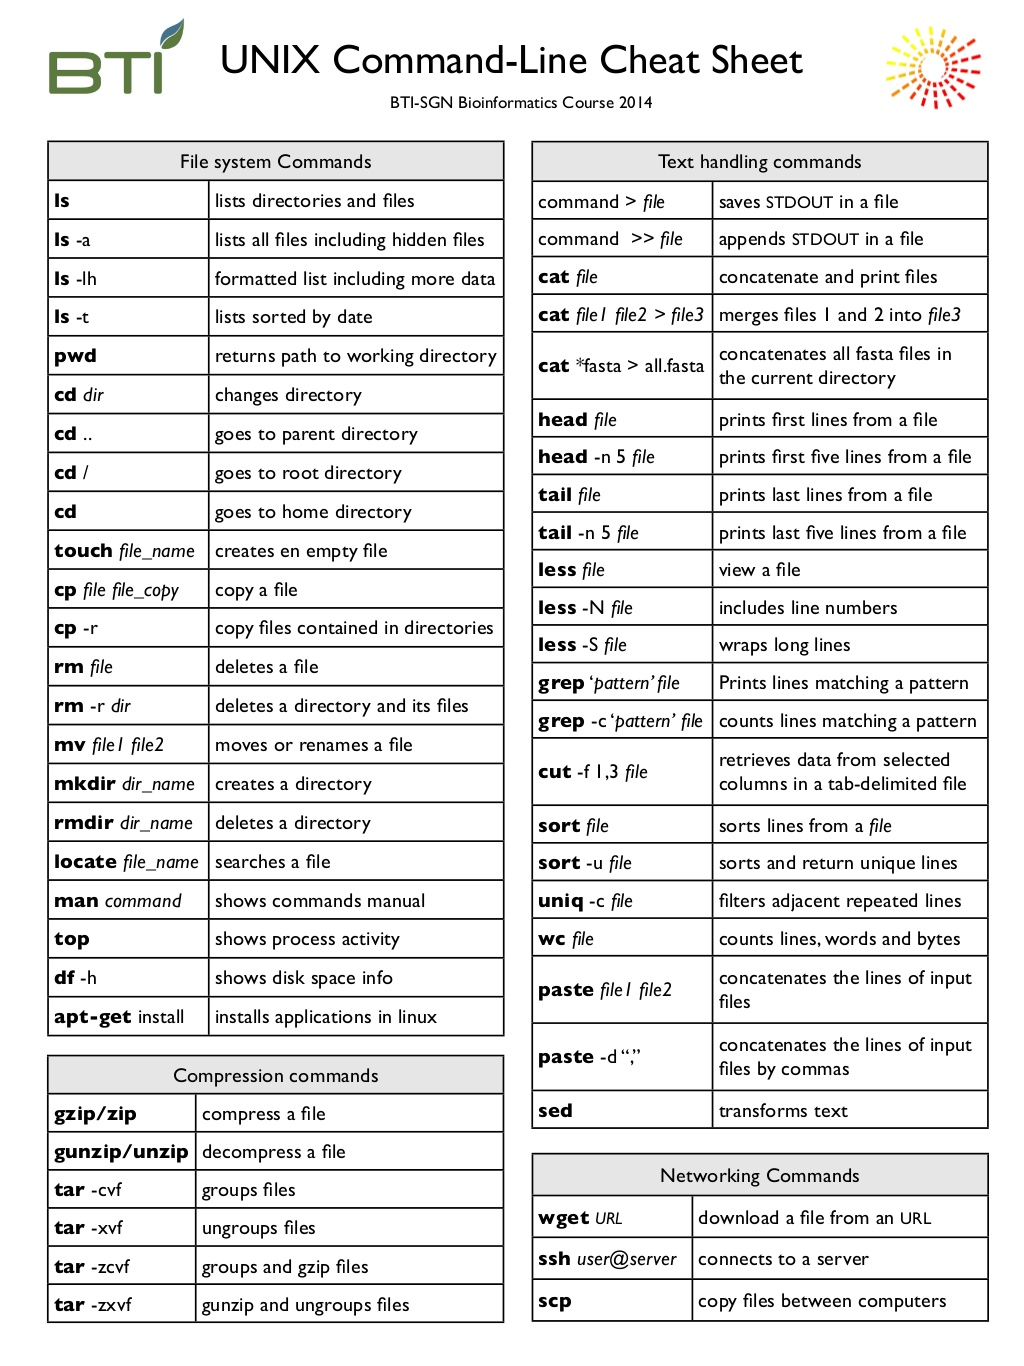

# Ipython and Magic Commands

## Ipython

Ipython In and Out Objects

In [ ]:
7*6

42

In [ ]:
print(Out[1])

42


In [ ]:
print(In[2])

print(Out[1])


In [ ]:
print(In)
#outputs a list of all inputs with index

['', '7*6', 'print(Out[1])', 'print(In[3])', 'print(In[2])', 'print(In)\n#outputs a list of all inputs with index']


In [ ]:
print(Out)
#Out returns a dictionary

{1: 42}


Note that not all operations have outputs: for example, import statements and print statements don't affect the output. The latter may be surprising, but makes sense if you consider that print is a function that returns None; for brevity, any command that returns None is not added to Out.

Underscore Shortcuts and Previous Outputs

> The standard Python shell contains just one simple shortcut for accessing previous output; the variable _ is kept updated with the previous output; this works in IPython as well: <br > But IPython takes this a bit further—you can use a double underscore to access the second-to-last output, and a triple underscore to access the third-to-last output (skipping any commands with no output):

In [ ]:
3+3

6

In [ ]:
4+4+1

9

In [ ]:
print(_)

9


In [ ]:
print(__)

6


In [ ]:
print(___)

42


Suppressing Output <br > 
Sometimes you might wish to suppress the output of a statement (this is perhaps most common with the plotting commands that we'll explore in Introduction to Matplotlib). Or maybe the command you're executing produces a result that you'd prefer not like to store in your output history, perhaps so that it can be deallocated when other references are removed. The easiest way to suppress the output of a command is to add a semicolon to the end of the line:

In [ ]:
import math
math.sin(2) + math.cos(2);

## Shell Commands & Ipython

**Shell Commands in Ipython**<br>
Any command that works at the command-line can be used in IPython by prefixing it with the ``!`` character.
For example, the ``ls``, ``pwd``, and ``echo`` commands can be run as follows:

```ipython
In [1]: !ls
myproject.txt

In [2]: !pwd
/home/jake/projects/myproject

In [3]: !echo "printing from the shell"
printing from the shell
```

**Passing Values to and from the Shell**

Shell commands can not only be called from IPython, but can also be made to interact with the IPython namespace.
For example, you can save the output of any shell command to a Python list using the assignment operator:

```ipython
In [4]: contents = !ls

In [5]: print(contents)
['myproject.txt']

In [6]: directory = !pwd

In [7]: print(directory)
['/Users/jakevdp/notebooks/tmp/myproject']
```

Note that these results are not returned as lists, but as a special shell return type defined in IPython:

```ipython
In [8]: type(directory)
IPython.utils.text.SList
```

This looks and acts a lot like a Python list, but has additional functionality, such as
the ``grep`` and ``fields`` methods and the ``s``, ``n``, and ``p`` properties that allow you to search, filter, and display the results in convenient ways.
For more information on these, you can use IPython's built-in help features.

In [ ]:
contents = !ls sample_data/
contents

['anscombe.json\t\t      duplicate.txt\t     original.txt',
 'california_housing_test.csv   mnist_test.csv\t     README.md',
 'california_housing_train.csv  mnist_train_small.csv']

In [ ]:
directory = !pwd
directory

['/content']

**Shell-Related Magic Commands**

If you play with IPython's shell commands for a while, you might notice that you cannot use ``!cd`` to navigate the filesystem:

```ipython
In [11]: !pwd
/home/jake/projects/myproject

In [12]: !cd ..

In [13]: !pwd
/home/jake/projects/myproject
```

The reason is that shell commands in the notebook are executed in a temporary subshell.
If you'd like to change the working directory in a more enduring way, you can use the ``%cd`` magic command:

```ipython
In [14]: %cd ..
/home/jake/projects
```

In fact, by default you can even use this without the ``%`` sign:

```ipython
In [15]: cd myproject
/home/jake/projects/myproject
```

This is known as an ``automagic`` function, and this behavior can be toggled with the ``%automagic`` magic function.

Besides ``%cd``, other available shell-like magic functions are ``%cat``, ``%cp``, ``%env``, ``%ls``, ``%man``, ``%mkdir``, ``%more``, ``%mv``, ``%pwd``, ``%rm``, and ``%rmdir``, any of which can be used without the ``%`` sign if ``automagic`` is on.
This makes it so that you can almost treat the IPython prompt as if it's a normal shell:

```ipython
In [16]: mkdir tmp

In [17]: ls
myproject.txt  tmp/

In [18]: cp myproject.txt tmp/

In [19]: ls tmp
myproject.txt

In [20]: rm -r tmp
```

This access to the shell from within the same terminal window as your Python session means that there is a lot less switching back and forth between interpreter and shell as you write your Python code.

## Cool magic 

Writing cell to a file

In [ ]:
!ls

example.py  __pycache__  sample_data


In [ ]:
%%writefile body_mass.py
def bmi(ht, weight):
    meters = ht * 0.0254 
    kg = weight * 0.453592
    bmindex = kg / meters **2
    return bmindex

Writing body_mass.py


In [ ]:
!cat body_mass.py

def bmi(ht, weight):
    meters = ht * 0.0254 
    kg = weight * 0.453592
    bmindex = kg / meters **2
    return bmindex

In [ ]:
from body_mass import bmi

bmi(70,145)

20.805103242859545

# Console & Bash Basics

In [ ]:
!pip install kora

     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 


In [ ]:
from kora import console

In [ ]:
console.start()

Console URL: https://teleconsole.com/s/74f8d2ce5926b1d5fc8c61d3b3aa3cfeced36094


In [ ]:
console.stop()

## Manipulating files and directories

The filesystem manages files and directories (or folders). Each is identified by an absolute path that shows how to reach it from the filesystem's root directory: /home/repl is the directory repl in the directory home, while /home/repl/course.txt is a file course.txt in that directory, and / on its own is the root directory.

To find out where you are in the filesystem, run the command pwd (short for "print working directory"). This prints the absolute path of your current working directory, which is where the shell runs commands and looks for files by default.

**Current working directory:**

In [ ]:
!pwd

/content


List contents of cwd:

In [ ]:
!ls

sample_data


List contents of directory with full path

In [ ]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


Absolute vs Relative path: <br>
An absolute path is like a latitude and longitude: it has the same value no matter where you are. A relative path, on the other hand, specifies a location starting from where you are: it's like saying "20 kilometers north".

As examples:

If you are in the directory /home/repl, the relative path seasonal specifies the same directory as the absolute path /home/repl/seasonal.
If you are in the directory /home/repl/seasonal, the relative path winter.csv specifies the same file as the absolute path /home/repl/seasonal/winter.csv.
The shell decides if a path is absolute or relative by looking at its first character: If it begins with /, it is absolute. If it does not begin with /, it is relative.

Absolute path:

In [ ]:
!ls /content/sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


Relative path: (already in content directory)

In [ ]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


**Moving to another directory**




In [ ]:
!mkdir maria

In [ ]:
%cd /content/maria

/content/maria


Link on why %magic command needed for changing directories in colab <br>
https://stackoverflow.com/questions/48298146/changing-directory-in-google-colab-breaking-out-of-the-python-interpreter

In [ ]:
!pwd

/content/maria


Moving up a directory: 

The parent of a directory is the directory above it. For example, /home is the parent of /home/repl, and /home/repl is the parent of /home/repl/seasonal. You can always give the absolute path of your parent directory to commands like cd and ls. More often, though, you will take advantage of the fact that the special path .. (two dots with no spaces) means "the directory above the one I'm currently in". If you are in /home/repl/seasonal, then cd .. moves you up to /home/repl. If you use cd .. once again, it puts you in /home. One more cd .. puts you in the root directory /, which is the very top of the filesystem. (Remember to put a space between cd and .. - it is a command and a path, not a single four-letter command.)

A single dot on its own, ., always means "the current directory", so ls on its own and ls . do the same thing, while cd . has no effect (because it moves you into the directory you're currently in).

One final special path is ~ (the tilde character), which means "your home directory", such as /home/repl. No matter where you are, ls ~ will always list the contents of your home directory, and cd ~ will always take you home.



In [ ]:
%cd ..

/content


In [ ]:
%cd maria

/content/maria


Home directory

In [ ]:
%cd ~

/root


In [ ]:
%cd /content

/content


**Copying / Moving / Renaming / Deleting Files**



Copy File

In [ ]:
%cd sample_data/

/content/sample_data


In [ ]:
!touch original.txt
#creating file to copy

In [ ]:
!ls  

anscombe.json		      duplicate.txt	     original.txt
california_housing_test.csv   mnist_test.csv	     README.md
california_housing_train.csv  mnist_train_small.csv


In [ ]:
!cp original.txt duplicate.txt
#creates duplicate of original.txt called duplicate.txt

In [ ]:
!ls

anscombe.json		      duplicate.txt	     original.txt
california_housing_test.csv   mnist_test.csv	     README.md
california_housing_train.csv  mnist_train_small.csv


In [ ]:
%cp original.txt duplicate.txt /content/maria/
#if last parameter to cp is an existing directory then command copies files into that directory

In [ ]:
!ls /content/maria

duplicate.txt  original.txt


In [ ]:
%cd ..

/content


Move File

In [ ]:
!touch moveme.txt

In [ ]:
!mv moveme.txt maria

In [ ]:
!ls maria

duplicate.txt  moveme.txt  original.txt


Rename File

mv can also be used to rename files. If you run:<br>
`mv course.txt old-course.txt`<br>
then the file course.txt in the current working directory is "moved" to the file old-course.txt. This is different from the way file browsers work, but is often handy.

One warning: just like cp, mv will overwrite existing files. If, for example, you already have a file called old-course.txt, then the command shown above will replace it with whatever is in course.txt.

In [ ]:
!mv maria/moveme.txt maria/moved.txt

In [ ]:
!ls maria

duplicate.txt  moved.txt  original.txt


Deleting Files

We can copy files and move them around; to delete them, we use rm, which stands for "remove". As with cp and mv, you can give rm the names of as many files as you'd like, so:
<br>
`rm thesis.txt backup/thesis-2017-08.txt`
<br>
removes both thesis.txt and backup/thesis-2017-08.txt

rm does exactly what its name says, and it does it right away: unlike graphical file browsers, the shell doesn't have a trash can, so when you type the command above, your thesis is gone for good.

In [ ]:
!rm maria/duplicate.txt

In [ ]:
!ls maria

moved.txt  original.txt


**Creating and Deleting Directories**

`mv` treats directories the same way it treats files: if you are in your home directory and run `mv seasonal by-season` , for example, `mv` changes the name of the `seasonal` directory to `by-season`. However, rm works differently.

If you try to `rm` a directory, the shell prints an error message telling you it can't do that, primarily to stop you from accidentally deleting an entire directory full of work. Instead, you can use a separate command called `rmdir`. For added safety, it only works when the directory is empty, so you must delete the files in a directory before you delete the directory. (Experienced users can use the `-r` option to rm to get the same effect; we will discuss command options in the next chapter.)

In [ ]:
!mkdir misty

In [ ]:
!ls

maria  misty  sample_data


In [ ]:
!mv misty martin

In [ ]:
!ls

maria  martin  sample_data


In [ ]:
!rmdir martin

In [ ]:
!ls

maria  sample_data


## Manipulating Data

In [ ]:
!pwd

/content


In [ ]:
!ls sample_data/

anscombe.json		      duplicate.txt	     original.txt
california_housing_test.csv   mnist_test.csv	     README.md
california_housing_train.csv  mnist_train_small.csv


cat prints files contents

In [ ]:
!cat sample_data/README.md

This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://developers.google.com/machine-learning/crash-course/california-housing-data-description

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/

*   `anscombe.json` contains a copy of
    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it
    was originally described in

    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American
    Statistician. 27 (1): 17-21. JSTOR 2682899.

    and our copy was prepared by the
    [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/anscombe.json).


**How can I view a file's contents piece by piece?**<br>
You can use `cat` to print large files and then scroll through the output, but it is usually more convenient to page the output. The original command for doing this was called more, but it has been superseded by a more powerful command called `less`. (This kind of naming is what passes for humor in the Unix world.) When you `less` a file, one page is displayed at a time; you can press spacebar to page down or type `q` to quit.

If you give `less` the names of several files, you can type `:n` (colon and a lower-case 'n') to move to the next file, `:p` to go back to the previous one, or `:q` to quit.

Note: If you view solutions to exercises that use less, you will see an extra command at the end that turns paging off so that we can test your solutions efficiently.

In [ ]:
!less sample_data/california_housing_test.csv

"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","popu lation","households","median_income","median_house_value"
-122.050000,37.370000,27.000000,3885.000000,661.000000,1537.000000,606.000000,6. 608500,344700.000000
-118.300000,34.260000,43.000000,1510.000000,310.000000,809.000000,277.000000,3.5 99000,176500.000000
-117.810000,33.780000,27.000000,3589.000000,507.000000,1484.000000,495.000000,5. 793400,270500.000000
-118.360000,33.820000,28.000000,67.000000,15.000000,49.000000,11.000000,6.135900 ,330000.000000
-119.670000,36.330000,19.000000,1241.000000,244.000000,850.000000,237.000000,2.9 37500,81700.000000
-119.560000,36.510000,37.000000,1018.000000,213.000000,663.000000,204.000000,1.6 63500,67000.000000
-121.430000,38.630000,43.000000,1009.000000,225.000000,604.000000,218.000000,1.6 64100,67000.000000
-120.650000,35.480000,19.000000,2310.000000,471.000000,1341.000000,441.000000,3. 225000,166900.000000
-122.840000,38.400000,15.000000,3080.000000,617.0

head - view start of a file (great for tabular data)

In [ ]:
!head sample_data/california_housing_test.csv 

### Flags

**How can I control what commands do?** <br>
You won't always want to look at the first 10 lines of a file, so the shell lets you change head's behavior by giving it a command-line flag (or just "flag" for short). If you run the command:
<br>
`head -n 3 seasonal/summer.csv`
<br>
`head` will only display the first three lines of the file. If you run `head -n 100`, it will display the first 100 (assuming there are that many), and so on.

A flag's name usually indicates its purpose (for example, `-n` is meant to signal "number of lines"). Command flags don't have to be a - followed by a single letter, but it's a widely-used convention.

Note: it's considered good style to put all flags before any filenames, so in this course, we only accept answers that do that.

In [ ]:
!head -n 3 sample_data/california_housing_test.csv

"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-122.050000,37.370000,27.000000,3885.000000,661.000000,1537.000000,606.000000,6.608500,344700.000000
-118.300000,34.260000,43.000000,1510.000000,310.000000,809.000000,277.000000,3.599000,176500.000000


**How can I list everything below a directory?**<br>
In order to see everything underneath a directory, no matter how deeply nested it is, you can give ls the flag `-R` (which means "recursive"). If you use `ls -R` in your home directory, this shows every file and directory in the current level, then everything in each sub-directory, and so on.

In [ ]:
!ls -R 

.:
maria  sample_data

./maria:
moved.txt  original.txt

./sample_data:
anscombe.json		      duplicate.txt	     original.txt
california_housing_test.csv   mnist_test.csv	     README.md
california_housing_train.csv  mnist_train_small.csv


**How can I select columns from a file?**<br>
`head` and `tail` let you select rows from a text file. If you want to select columns, you can use the command `cut`. It has several options (use` man cut` to explore them), but the most common is something like:
<br>
`cut -f 2-5,8 -d , values.csv` <br>
which means "select columns 2 through 5 and columns 8, using comma as the separator". `cut` uses `-f` (meaning "fields") to specify columns and `-d `(meaning "delimiter") to specify the separator. You need to specify the latter because some files may use spaces, tabs, or colons to separate columns.

In [ ]:
q = !cut -f 2-5,8 -d , sample_data/california_housing_test.csv
q[:10]

['"latitude","housing_median_age","total_rooms","total_bedrooms","median_income"',
 '37.370000,27.000000,3885.000000,661.000000,6.608500',
 '34.260000,43.000000,1510.000000,310.000000,3.599000',
 '33.780000,27.000000,3589.000000,507.000000,5.793400',
 '33.820000,28.000000,67.000000,15.000000,6.135900',
 '36.330000,19.000000,1241.000000,244.000000,2.937500',
 '36.510000,37.000000,1018.000000,213.000000,1.663500',
 '38.630000,43.000000,1009.000000,225.000000,1.664100',
 '35.480000,19.000000,2310.000000,471.000000,3.225000',
 '38.400000,15.000000,3080.000000,617.000000,3.669600']

**What can't cut do?** <br>
cut is a simple-minded command. In particular, it doesn't understand quoted strings. If specified delimiter found inside quote, cut will think it is delim

**How can I repeat commands?** <br>
One of the biggest advantages of using the shell is that it makes it easy for you to do things over again. If you run some commands, you can then press the up-arrow key to cycle back through them. You can also use the left and right arrow keys and the delete key to edit them. Pressing return will then run the modified command.

Even better, `history` will print a list of commands you have run recently. Each one is preceded by a serial number to make it easy to re-run particular commands: just type `!55` to re-run the 55th command in your history (if you have that many). You can also re-run a command by typing an exclamation mark followed by the command's name, such as `!head` or `!cut`, which will re-run the most recent use of that command.

In [ ]:
%history


!pwd
!ls sample_data/
!cat sample_data/california_housing_test.csv
!cat sample_data/README.md
!less sample_data/california_housing_test.csv
%less sample_data/california_housing_test.csv
!less sample_data/california_housing_test.csv
!less sample_data/california_housing_test.csv
!head sample_data/california_housing_test.csv
!head -n 3 sample_data/california_housing_test.csv
!ls -R
!pwd
!ls
!ls sample_data
!ls /content/sample_data
!ls sample_data
!mkdir maria
%cd /content/maria
!pwd
%cd ..
%cd maria
%cd ~
%cd /content
%cd sample_data/
!touch original.txt
#creating file to copy
!ls
!cp original.txt duplicate.txt
#creates duplicate of original.txt called duplicate.txt
!ls
%cp original.txt duplicate.txt /content/maria/
#if last parameter to cp is an existing directory then command copies files into that directory
!ls /content/maria
!touch moveme.txt
!mv moveme.txt /content/maria
!ls /content/maria
!mv maria/moveme.txt maria/moved.txt
!ls maria
!ls
%cd ..
!touch sample_data/original.txt
#crea

**How can I select lines containing specific values?** <br> 
`head` and `tail` select rows, `cut` selects columns, and `grep` selects lines according to what they contain. In its simplest form, grep takes a piece of text followed by one or more filenames and prints all of the lines in those files that contain that text. For example, `grep bicuspid seasonal/winter.csv `prints lines from `winter.csv` that contain "bicuspid".

`grep` can search for patterns as well; we will explore those in the next course. What's more important right now is some of `grep`'s more common flags:

* c: print a count of matching lines rather than the lines themselves
* h: do not print the names of files when searching multiple files
* i: ignore case (e.g., treat "Regression" and "regression" as matches)
* l: print the names of files that contain matches, not the matches
* n: print line numbers for matching lines
* v: invert the match, i.e., only show lines that don't match

In [ ]:
!grep -n 176500 sample_data/california_housing_test.csv

3:-118.300000,34.260000,43.000000,1510.000000,310.000000,809.000000,277.000000,3.599000,176500.000000
472:-117.280000,34.150000,32.000000,2170.000000,430.000000,815.000000,401.000000,3.176500,135000.000000
2509:-118.150000,33.770000,52.000000,2204.000000,498.000000,899.000000,445.000000,4.176500,393900.000000


In [ ]:
!grep -c 176500 sample_data/california_housing_test.csv

3


In [ ]:
!grep -c 176500 sample_data/california_housing_test.csv sample_data/california_housing_train.csv

sample_data/california_housing_test.csv:3
sample_data/california_housing_train.csv:7


## Combining Tools

Storing command's output in a file

The greater-than sign `>` tells the shell to redirect head's output to a file. It isn't part of the `head` command; instead, it works with every shell command that produces output.

In [ ]:
!head sample_data/README.md > something.txt

In [ ]:
!cat something.txt

This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://developers.google.com/machine-learning/crash-course/california-housing-data-description

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/



In [ ]:
!head -n 5 sample_data/california_housing_test.csv > first_five.csv

In [ ]:
!cat first_five.csv

"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-122.050000,37.370000,27.000000,3885.000000,661.000000,1537.000000,606.000000,6.608500,344700.000000
-118.300000,34.260000,43.000000,1510.000000,310.000000,809.000000,277.000000,3.599000,176500.000000
-117.810000,33.780000,27.000000,3589.000000,507.000000,1484.000000,495.000000,5.793400,270500.000000
-118.360000,33.820000,28.000000,67.000000,15.000000,49.000000,11.000000,6.135900,330000.000000


Combining commands with pipe character

In [ ]:
!head -n 5 sample_data/california_housing_test.csv | tail -n-2

-117.810000,33.780000,27.000000,3589.000000,507.000000,1484.000000,495.000000,5.793400,270500.000000
-118.360000,33.820000,28.000000,67.000000,15.000000,49.000000,11.000000,6.135900,330000.000000


Specifying many files at once:

In [ ]:
#manually
!head -n 3 sample_data/california_housing_test.csv sample_data/california_housing_train.csv
#returns 6 lines total

==> sample_data/california_housing_test.csv <==
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-122.050000,37.370000,27.000000,3885.000000,661.000000,1537.000000,606.000000,6.608500,344700.000000
-118.300000,34.260000,43.000000,1510.000000,310.000000,809.000000,277.000000,3.599000,176500.000000

==> sample_data/california_housing_train.csv <==
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000


In [ ]:
# using wildcard operator
!head -n3 sample_data/c*
#returns all files in folder starting with c

==> sample_data/california_housing_test.csv <==
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-122.050000,37.370000,27.000000,3885.000000,661.000000,1537.000000,606.000000,6.608500,344700.000000
-118.300000,34.260000,43.000000,1510.000000,310.000000,809.000000,277.000000,3.599000,176500.000000

==> sample_data/california_housing_train.csv <==
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000


Sorting output:


In [ ]:
!ls

sample_data


In [ ]:
!head -n 15 sample_data/california_housing_test.csv | cut -d, -f 2 | sort -n -r   
# get first fifteen rows                             - grab 2nd column - sort numerically (-n) and reverse order (-r)

38.630000
38.400000
37.370000
37.250000
36.510000
36.330000
35.850000
35.480000
34.260000
34.080000
33.980000
33.820000
33.780000
32.970000
"latitude"


## Batch Processing

**How does the shell store information?** <br>
Like other programs, the shell stores information in variables. Some of these, called environment variables, are available all the time. Environment variables' names are conventionally written in upper case, and a few of the more commonly-used ones are shown below.

To get a complete list (which is quite long), you can type `set` in the shell.



In [ ]:

import pandas as pd
df = pd.DataFrame({'Variable':['HOME', 'PWD', 'SHELL', 'USER'],
                   'Purpose': ["User's home directory", "Present working directory", 'Which shell program is being used', "User's ID"],
                   'Value': ['/root','Same as pwd command', '/bin/bash', '0'] })
df

,Variable,Purpose,Value
0,HOME,User's home directory,/root
1,PWD,Present working directory,Same as pwd command
2,SHELL,Which shell program is being used,/bin/bash
3,USER,User's ID,0


can combine set and grep to get values of specific variables

In [ ]:
% cd ~

/root


In [ ]:
!set | grep HOME

BASH_EXECUTION_STRING='set | grep HOME'
HOME=/root


In [ ]:
!set | grep UID

BASH_EXECUTION_STRING='set | grep UID'
EUID=0
UID=0


First 5 environment variables:

In [ ]:
!set | head -n 5

BASH=/bin/bash
BASHOPTS=cmdhist:complete_fullquote:extquote:force_fignore:hostcomplete:interactive_comments:progcomp:promptvars:sourcepath
BASH_ALIASES=()
BASH_ARGC=()
BASH_ARGV=()


Printing value of variables

In [ ]:
!echo $HOME

/root


**How else does the shell store information?** <br>
The other kind of variable is called a shell variable, which is like a local variable in a programming language.

To create a shell variable, you simply assign a value to a name:

In [ ]:
%cd /content/

/content


In [ ]:
!ls sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
!train=sample_data/california_housing_train.csv

In [ ]:
!echo $train
#why doesn't work? hmmm

In [ ]:
!set | grep train

BASH_EXECUTION_STRING='set | grep train'


**Repeating a Command Multiple Times** <br>
loops

In [ ]:
!for filetype in gif jpg png; do echo $filetype; done

gif
jpg
png


Notice these things about the loop:

1. The structure is `for` …variable… `in` …list… ; `do` …body… ; `done`
2. The list of things the loop is to process (in our case, the words `gif`, `jpg`, and `png`).
3. The variable that keeps track of which thing the loop is currently processing (in our case, `filetype`).
4. The body of the loop that does the processing (in our case, `echo $filetype)`.
Notice that the body uses `$filetype` to get the variable's value instead of just `filetype`, just like it does with any other shell variable. Also notice where the semi-colons go: the first one comes between the list and the keyword `do`, and the second comes between the body and the keyword done.

**How can I repeat a command once for each file?**

You can always type in the names of the files you want to process when writing the loop, but it's usually better to use wildcards. 

In [ ]:
!for filename in sample_data/*.csv; do echo $filename; done

sample_data/california_housing_test.csv
sample_data/california_housing_train.csv
sample_data/mnist_test.csv
sample_data/mnist_train_small.csv


**How can I record the names of a set of files?**

People often set a variable using a wildcard expression to record a list of filenames.

In [ ]:
! datasets=sample_data/*.csv

In [ ]:
!for filename in $datasets; do echo $filename; done

**How can I do many things in a single loop?**

The loops you have seen so far all have a single command or pipeline in their body, but a loop can contain any number of commands. To tell the shell where one ends and the next begins, you must separate them with semi-colons:



In [ ]:
!for f in sample_data/*.csv; do echo $f;cut -d , -f 2 $f |head -n 1; done


sample_data/california_housing_test.csv
"latitude"
sample_data/california_housing_train.csv
"latitude"
sample_data/mnist_test.csv
0
sample_data/mnist_train_small.csv
0


## Creating New Tools

Editing files:

Unix has many text editors (vim, nano)

**How can I record what I just did?**

When you are doing a complex analysis, you will often want to keep a record of the commands you used. You can do this with the tools you have already seen:

1. Run history.
2. Pipe its output to tail -n 10 (or however many recent steps you want to save).
3. Redirect that to a file called something like figure-5.history.

In [ ]:
% history | tail 

**How can I save commands to re-run later?**

You have been using the shell interactively so far. But since the commands you type in are just text, you can store them in files for the shell to run over and over again. To start exploring this powerful capability, put the following command in a file called `headers.sh`:

In [ ]:
%%writefile headers.sh
head -n 1 sample_data/*.csv 
#ipython magic command to write bash command to file 'headers.sh'
  #could also use vim or other editor to write to file 

Overwriting headers.sh


In [ ]:
!cat headers.sh

head -n 1 sample_data/*.csv 

In [ ]:
!bash headers.sh

==> sample_data/california_housing_test.csv <==
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"

==> sample_data/california_housing_train.csv <==
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"

==> sample_data/mnist_test.csv <==
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,25

**How can I re-use pipes?**

A file full of shell commands is called a *shell script, or sometimes just a "script" for short. Scripts don't have to have names ending in .sh, but this lesson will use that convention to help you keep track of which files are scripts.

Scripts can also contain pipes. 

In [ ]:
%%writefile grab_cell.sh
head -n 1 sample_data/california_housing_test.csv |cut -d , -f 1

Overwriting grab_cell.sh


In [ ]:
!bash grab_cell.sh

"longitude"


**How can I pass filenames to scripts?** 

A script that processes specific files is useful as a record of what you did, but one that allows you to process any files you want is more useful. To support this, you can use the special expression `$@` (dollar sign immediately followed by at-sign) to mean "all of the command-line parameters given to the script".

For example, if` unique-lines.sh` contains sort `$@ | uniq`, when you run:

`bash unique-lines.sh seasonal/summer.csv`

the shell replaces `$@` with `seasonal/summer.csv` and processes one file. If you run this:

`bash unique-lines.sh seasonal/summer.csv seasonal/autumn.csv`

it processes two data files, and so on.

In [ ]:
%%writefile col_names.sh
head -n 1 $@ 

Writing col_names.sh


In [ ]:
!bash col_names.sh sample_data/california_housing_test.csv sample_data/california_housing_train.csv
#returns column names for both file paths passed above

==> sample_data/california_housing_test.csv <==
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"

==> sample_data/california_housing_train.csv <==
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"


**How can I process arguments?**

As well as `$@,` the shell lets you use `$1`, `$2`, and so on to refer to specific command-line parameters. You can use this to write commands that feel simpler or more natural than the shell's. For example, you can create a script called `column.sh` that selects a single column from a CSV file when the user provides the filename as the first parameter and the column as the second:

In [ ]:
%%writefile col_select.sh
cut -d , -f $2 $1 | head -n 5

Overwriting col_select.sh


In [ ]:
!bash col_select.sh sample_data/c*.csv 2
#y doesn't work? 

cut: invalid field value ‘sample_data/california_housing_train.csv’
Try 'cut --help' for more information.


In [ ]:
!cut -d , -f 1 sample_data/c*.csv | head -n 5

"longitude"
-122.050000
-118.300000
-117.810000
-118.360000


**How can I write loops in a shell script?**

Shell scripts can also contain loops. You can write them using semi-colons, or split them across lines without semi-colons to make them more readable:

In [ ]:
%%writefile qwik_view.sh
for filename in $@
do
    head -n 2 $filename | tail -n 1
    tail -n 1 $filename
done
#selects first and last rows of flat file

Overwriting qwik_view.sh


In [ ]:
!bash qwik_view.sh sample_data/california_housing_test.csv 


-122.050000,37.370000,27.000000,3885.000000,661.000000,1537.000000,606.000000,6.608500,344700.000000
-119.630000,34.420000,42.000000,1765.000000,263.000000,753.000000,260.000000,8.560800,500001.000000


# Data Processing in Shell

## Downloading Data

**Downloading data using curl**

curl:
* Client URLS
* Unix command line tool
* Transfers data to and from a server

Basic `curl` syntax:

curl [option flags] [URL]

In [ ]:
! curl -O https://assets.datacamp.com/production/repositories/4180/datasets/513986f5ea7ed9a8565bba20d088d21c10e099dc/Spotify_MusicAttributes.csv
# -O tag indicates to save file with its original name

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1717  100  1717    0     0  13736      0 --:--:-- --:--:-- --:--:-- 13736


In [ ]:
!head Spotify_MusicAttributes.csv

track_id,danceability,duration_ms,instrumentalness,loudness,tempo,time_signature
118GQ70Sp6pMqn6w1oKuki,0.787,124016.0,0.784,-10.457,119.988,4.0
6S7cr72a7a8RVAXzDCRj6m,0.777,128016.0,0.812,-12.181,119.979,4.0
7h2qWpMJzIVtiP30E8VDW4,0.795999999999999,132742.0,0.919,-8.86,123.973,4.0
3KVQFxJ5CWOcbxdpPYdi4o,0.815,134769.0,0.938,-10.6659999999999,122.001,4.0
0JjNrI1xmsTfhaiU1R6OVc,0.799,124016.0,0.915,-9.83,120.079,4.0
3HjTcZt29JUHg5m60QhlMw,0.812,134769.0,0.914,-11.5979999999999,121.994,4.0
42LWRdkWxM9aWmDImWvH6C,0.810999999999999,124016.0,0.929,-10.885,120.007,4.0
32dMH9MvlTJaABrPHY52Yb,0.746,127727.0,0.966,-16.615,124.032,4.0
5RCPsfzmEpTXMCTNk7wEfQ,0.813,134769.0,0.890999999999999,-11.058,122.01,4.0


Downloading Multiple Files using Wildcards

In [ ]:
! curl -O https://assets.datacamp.com/production/repositories/4180/datasets/513986f5ea7ed9a8565bba20d088d21c10e099dc/Spotify*.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   619  100   619    0     0   1595      0 --:--:-- --:--:-- --:--:--  1595


Useful option flags:
* -L redirects the HTTP URL if a 300 error occurs
* -C resumes a previous file transfer if it times out before completion

**Downloading data using wget**

Better than curl at downloading multiple files recursively

Basic `wget` syntax:

wget [option flags] [URL]

unique flags:
* -b: go to background immediately after startup
* -q: turn off the wget output
* -c: resume broken download (continue getting a partially downloaded file)


In [ ]:
! wget  https://assets.datacamp.com/production/repositories/4180/datasets/513986f5ea7ed9a8565bba20d088d21c10e099dc/Spotify_MusicAttributes.csv

--2020-12-12 15:09:42--  https://assets.datacamp.com/production/repositories/4180/datasets/513986f5ea7ed9a8565bba20d088d21c10e099dc/Spotify_MusicAttributes.csv
Resolving assets.datacamp.com (assets.datacamp.com)... 104.18.17.147, 104.18.16.147
Connecting to assets.datacamp.com (assets.datacamp.com)|104.18.17.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1717 (1.7K) [text/csv]
Saving to: ‘Spotify_MusicAttributes.csv’

Spotify_MusicAttrib 100%[===================>]   1.68K  --.-KB/s    in 0s      

2020-12-12 15:09:42 (29.3 MB/s) - ‘Spotify_MusicAttributes.csv’ saved [1717/1717]



**Advanced downloading with wget**

>Multiple file downloading

Save a list of file locations in a text file

In [ ]:
%%writefile url_list.txt
https://assets.datacamp.com/production/repositories/4180/datasets/82c41048fc89f03f3b0a4122642bc4fd39306071/Spotify_Popularity.csv
https://assets.datacamp.com/production/repositories/4180/datasets/513986f5ea7ed9a8565bba20d088d21c10e099dc/Spotify_MusicAttributes.csv


Writing url_list.txt


In [ ]:
!cat url_list.txt

https://assets.datacamp.com/production/repositories/4180/datasets/82c41048fc89f03f3b0a4122642bc4fd39306071/Spotify_Popularity.csv
https://assets.datacamp.com/production/repositories/4180/datasets/513986f5ea7ed9a8565bba20d088d21c10e099dc/Spotify_MusicAttributes.csv

can now pass file to wget using `-i` flag (-i flag must be last one listed)

In [ ]:
!wget -i url_list.txt

--2020-12-12 15:16:03--  https://assets.datacamp.com/production/repositories/4180/datasets/82c41048fc89f03f3b0a4122642bc4fd39306071/Spotify_Popularity.csv
Resolving assets.datacamp.com (assets.datacamp.com)... 104.18.16.147, 104.18.17.147
Connecting to assets.datacamp.com (assets.datacamp.com)|104.18.16.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 668 [text/csv]
Saving to: ‘Spotify_Popularity.csv’

Spotify_Popularity. 100%[===================>]     668  --.-KB/s    in 0s      

2020-12-12 15:16:03 (11.6 MB/s) - ‘Spotify_Popularity.csv’ saved [668/668]

--2020-12-12 15:16:03--  https://assets.datacamp.com/production/repositories/4180/datasets/513986f5ea7ed9a8565bba20d088d21c10e099dc/Spotify_MusicAttributes.csv
Reusing existing connection to assets.datacamp.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1717 (1.7K) [text/csv]
Saving to: ‘Spotify_MusicAttributes.csv.1’

Spotify_MusicAttrib 100%[===================>]   1.68K  --.-KB/s    in

>Setting download constraints for large files

In [ ]:
!wget --limit-rate=200k -i url_list.txt

--2020-12-12 15:19:11--  https://assets.datacamp.com/production/repositories/4180/datasets/82c41048fc89f03f3b0a4122642bc4fd39306071/Spotify_Popularity.csv
Resolving assets.datacamp.com (assets.datacamp.com)... 104.18.16.147, 104.18.17.147
Connecting to assets.datacamp.com (assets.datacamp.com)|104.18.16.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 668 [text/csv]
Saving to: ‘Spotify_Popularity.csv’

Spotify_Popularity. 100%[===================>]     668  --.-KB/s    in 0s      

2020-12-12 15:19:11 (13.4 MB/s) - ‘Spotify_Popularity.csv’ saved [668/668]

--2020-12-12 15:19:11--  https://assets.datacamp.com/production/repositories/4180/datasets/513986f5ea7ed9a8565bba20d088d21c10e099dc/Spotify_MusicAttributes.csv
Reusing existing connection to assets.datacamp.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1717 (1.7K) [text/csv]
Saving to: ‘Spotify_MusicAttributes.csv’

Spotify_MusicAttrib 100%[===================>]   1.68K  --.-KB/s    in 0

>Setting download constraints for smaller files (mandatory pause time (in seconds) between downloads with `--wait`)

In [ ]:
!wget --wait=5 -i url_list.txt

--2020-12-12 15:21:04--  https://assets.datacamp.com/production/repositories/4180/datasets/82c41048fc89f03f3b0a4122642bc4fd39306071/Spotify_Popularity.csv
Resolving assets.datacamp.com (assets.datacamp.com)... 104.18.16.147, 104.18.17.147
Connecting to assets.datacamp.com (assets.datacamp.com)|104.18.16.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 668 [text/csv]
Saving to: ‘Spotify_Popularity.csv’

Spotify_Popularity. 100%[===================>]     668  --.-KB/s    in 0s      

2020-12-12 15:21:04 (12.2 MB/s) - ‘Spotify_Popularity.csv’ saved [668/668]

--2020-12-12 15:21:09--  https://assets.datacamp.com/production/repositories/4180/datasets/513986f5ea7ed9a8565bba20d088d21c10e099dc/Spotify_MusicAttributes.csv
Reusing existing connection to assets.datacamp.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1717 (1.7K) [text/csv]
Saving to: ‘Spotify_MusicAttributes.csv’

Spotify_MusicAttrib 100%[===================>]   1.68K  --.-KB/s    in 0

curl vs Wget:
* curl can download/upload files from more protocols
* Easier to install across os'

* wget good for multiple file downloads
* can handle various file formats (file directory, HTML page)

## Data Cleaning and Munging (csvkit)

In [ ]:
!pip install csvkit

     |████████████████████████████████| 3.8MB 11.4MB/s 
     |████████████████████████████████| 102kB 8.4MB/s 
     |████████████████████████████████| 163kB 47.5MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
  Created wheel for csvkit: filename=csvkit-1.0.5-cp36-none-any.whl size=41629 sha256=efa6213227117e81b9389fa470e672892f6c468759c850d28ee9bb47e7882e9b
  Stored in directory: /root/.cache/pip/wheels/3d/ab/50/b046530c9276b2f84b722e90ead08119a580d5636561cfe2a6
  Created wheel for agate-excel: filename=agate_excel-0.2.3-py2.py3-none-any.whl size=6268 sha256=e18f869515d74f45b2cc69edcb2ab37f5109be80ff966d5ef7f82c06a44d6995
  Stored in directory: /root/.cache/pip/wheels/8a/2f/99/dbf1c6af14192030927240678c0d2176b479dcc44b51a3a6d0
  Created wheel for agate-dbf: filename=agate_dbf-0.2.2-py2.py3-none-any.whl size=3514 sha256=c44de1febe01a7dd21a2c668559aef46e3bc99e696937a68ce35a74235e29fe8
  Stored in directory: /root/.cache/pi

Data processing on the command line is simple and computationally efficient

csvkit: https://csvkit.readthedocs.io/en/latest/ 
* suite of command-line tools
* developed in Python by Wireservice
* offers data processing and cleaning capabilities on CSV files
* has capabilities that rival python, R, SQL

>excel file to csv

In [ ]:
!in2csv stock_data.xlsx > stock.csv
#saving output to new file stock.csv

/usr/local/lib/python3.6/dist-packages/agate/utils.py:276: UnnamedColumnWarning: Column 0 has no name. Using "a".


In [ ]:
!head stock.csv

a,BTG,BTI,CCF,GRC,GSAT,IMO,LNG,MJCO,RLGT,SEB,TXMD,VHC
BTG,1,0.04917977215899666,0.01198952217190686,-0.001392007295158257,-0.1186698008640241,0.1364220132408255,0.120155256071309,-0.03822072839933054,-0.06679049030965761,-0.001590492533539654,-0.01035491515459523,0.01232201538548291
BTI,0.04917977215899666,1,0.1285381642840798,0.1906579341165376,0.09532158612058596,0.3287840135603919,0.256594468353297,0.1346295863963002,0.09817697633882619,0.1748087480688341,0.09669328595547377,0.01343075920239117
CCF,0.01198952217190686,0.1285381642840798,1,0.2088069168653376,0.005990925266705743,0.2429132724260985,0.2166045460193128,-0.01791677401573675,0.3080584194008542,0.2368495676634183,0.1867383998229158,0.1702308349663271
GRC,-0.001392007295158257,0.1906579341165376,0.2088069168653376,1,0.1142202556257173,0.2672548229238033,0.2031636148223172,0.04475806699319412,0.2484377816596072,0.3217532996263691,0.3493409106891009,0.1350393743252351
GSAT,-0.1186698008640241,0.09532158612058596,0.00599092526

> selecting which sheet of excel file to copy:

In [ ]:
!in2csv -n stock_data.xlsx
#lists all sheet names of excel file

correlations
indexes
prices


In [ ]:
!in2csv stock_data.xlsx --sheet "indexes" | head
#not redirecting output to new file here, just showing head

/usr/local/lib/python3.6/dist-packages/agate/utils.py:276: UnnamedColumnWarning: Column 0 has no name. Using "a".
a,Index,SP500
2016-01-04,100,100
2016-01-05,100.2007492936535,100.201226237914
2016-01-06,98.80101356680152,98.8870450051176
2016-01-07,96.30248462602367,96.54338040205498
2016-01-08,95.14187201861101,95.49700396490216
2016-01-11,95.24454494669263,95.57848816988464
2016-01-12,95.642796892163,96.32426738743753
2016-01-13,93.9667145591871,93.91948963063805
2016-01-14,94.46506391397762,95.487563721642


> data preview on the command line (csvlook)

In [ ]:
!csvlook stock.csv

| a    |     BTG |    BTI |     CCF |     GRC |    GSAT |    IMO |    LNG |    MJCO |    RLGT |     SEB |    TXMD |     VHC |
| ---- | ------- | ------ | ------- | ------- | ------- | ------ | ------ | ------- | ------- | ------- | ------- | ------- |
| BTG  |  1.000… | 0.049… |  0.012… | -0.001… | -0.119… | 0.136… | 0.120… | -0.038… | -0.067… | -0.002… | -0.010… |  0.012… |
| BTI  |  0.049… | 1.000… |  0.129… |  0.191… |  0.095… | 0.329… | 0.257… |  0.135… |  0.098… |  0.175… |  0.097… |  0.013… |
| CCF  |  0.012… | 0.129… |  1.000… |  0.209… |  0.006… | 0.243… | 0.217… | -0.018… |  0.308… |  0.237… |  0.187… |  0.170… |
| GRC  | -0.001… | 0.191… |  0.209… |  1.000… |  0.114… | 0.267… | 0.203… |  0.045… |  0.248… |  0.322… |  0.349… |  0.135… |
| GSAT | -0.119… | 0.095… |  0.006… |  0.114… |  1.000… | 0.046… | 0.156… |  0.084… |  0.128… |  0.169… |  0.152… | -0.006… |
| IMO  |  0.136… | 0.329… |  0.243… |  0.267… |  0.046… | 1.000… | 0.534… |  0.094… |  0.191… |  0.165… |  0.182… |  0

>descriptive stats (csvstat) - like describe() method from pandas 

In [ ]:
!csvstat Spotify_Popularity.csv

  1. "track_id"

	Type of data:          Text
	Contains null values:  False
	Unique values:         24
	Longest value:         22 characters
	Most common values:    118GQ70Sp6pMqn6w1oKuki (1x)
	                       6S7cr72a7a8RVAXzDCRj6m (1x)
	                       7h2qWpMJzIVtiP30E8VDW4 (1x)
	                       3KVQFxJ5CWOcbxdpPYdi4o (1x)
	                       0JjNrI1xmsTfhaiU1R6OVc (1x)

  2. "popularity"

	Type of data:          Number
	Contains null values:  False
	Unique values:         2
	Smallest value:        6
	Largest value:         7
	Sum:                   154
	Mean:                  6.417
	Median:                6
	StDev:                 0.504
	Most common values:    6 (14x)
	                       7 (10x)

Row count: 24


### Filtering (columns and rows)

Filtering data using csvkit
* `csvcut`: filter data by **column** name or position
* `csvgrep`: filter data by **row** value (exact match, pattern matching, regex)

>get names of columns:

In [ ]:
!csvcut --names sample_data/california_housing_test.csv
#returns names of columns

  1: longitude
  2: latitude
  3: housing_median_age
  4: total_rooms
  5: total_bedrooms
  6: population
  7: households
  8: median_income
  9: median_house_value


>filter data by column position

In [ ]:
!csvcut -c 1 sample_data/california_housing_test.csv | head -n 5

longitude
-122.050000
-118.300000
-117.810000
-118.360000


In [ ]:
!csvcut -c 1-3 sample_data/california_housing_test.csv | head -n 5

longitude,latitude,housing_median_age
-122.050000,37.370000,27.000000
-118.300000,34.260000,43.000000
-117.810000,33.780000,27.000000
-118.360000,33.820000,28.000000


In [ ]:
!csvcut -c 1,3 sample_data/california_housing_test.csv | head -n 5

longitude,housing_median_age
-122.050000,27.000000
-118.300000,43.000000
-117.810000,27.000000
-118.360000,28.000000


>filtering data by column name

In [ ]:
!csvcut -c "longitude" sample_data/california_housing_test.csv | head -n 5

longitude
-122.050000
-118.300000
-117.810000
-118.360000


>filtering data by row value

`csvgrep`:
* filters by row using exact match or regex fuzzy matching
* must be paired with one of these options:
  * `-m`: followed by the exact row value to filter
  * `-r`: followed with a regex pattern
  * `-f`: followed by the path to a file

In [ ]:
!csvgrep --help | head

usage: csvgrep [-h] [-d DELIMITER] [-t] [-q QUOTECHAR] [-u {0,1,2,3}] [-b]
               [-p ESCAPECHAR] [-z FIELD_SIZE_LIMIT] [-e ENCODING] [-S] [-H]
               [-K SKIP_LINES] [-v] [-l] [--zero] [-V] [-n] [-c COLUMNS]
               [-m PATTERN] [-r REGEX] [-f MATCHFILE] [-i] [-a]
               [FILE]

Search CSV files. Like the Unix "grep" command, but for tabular data.

positional arguments:
  FILE                  The CSV file to operate on. If omitted, will accept


In [ ]:
!csvgrep -c "longitude" -m -122.05 sample_data/california_housing_test.csv
#returns all rows where longitude = 122.05
# no quotations for row argument 

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
-122.050000,37.370000,27.000000,3885.000000,661.000000,1537.000000,606.000000,6.608500,344700.000000
-122.050000,37.360000,34.000000,2400.000000,419.000000,1017.000000,384.000000,4.136900,316900.000000
-122.050000,38.260000,21.000000,7195.000000,1416.000000,3927.000000,1377.000000,3.091200,126300.000000
-122.050000,37.050000,41.000000,2422.000000,502.000000,915.000000,366.000000,4.167900,201300.000000
-122.050000,37.930000,15.000000,7803.000000,1603.000000,2957.000000,1546.000000,4.450000,184900.000000
-122.050000,37.310000,25.000000,4601.000000,696.000000,2003.000000,666.000000,8.072700,455500.000000
-122.050000,37.380000,24.000000,2424.000000,501.000000,1367.000000,507.000000,4.072000,364200.000000


### Stacking data and chaining commands

>csvstack - like pd.concat()

In [ ]:
!csvstack -h | head -n 20

usage: csvstack [-h] [-d DELIMITER] [-t] [-q QUOTECHAR] [-u {0,1,2,3}] [-b]
                [-p ESCAPECHAR] [-z FIELD_SIZE_LIMIT] [-e ENCODING] [-S] [-H]
                [-K SKIP_LINES] [-v] [-l] [--zero] [-V] [-g GROUPS]
                [-n GROUP_NAME] [--filenames]
                [FILE [FILE ...]]

Stack up the rows from multiple CSV files, optionally adding a grouping value.
Files are assumed to have the same columns in the same order.

positional arguments:
  FILE                  The CSV file(s) to operate on. If omitted, will accept
                        input as piped data via STDIN.

optional arguments:
  -h, --help            show this help message and exit
  -d DELIMITER, --delimiter DELIMITER
                        Delimiting character of the input CSV file.
  -t, --tabs            Specify that the input CSV file is delimited with
                        tabs. Overrides "-d".
  -q QUOTECHAR, --quotechar QUOTECHAR


In [ ]:
!csvstack sample_data/california_housing_test.csv sample_data/california_housing_train.csv > sample_data/california_housing_all.csv

In [ ]:
!wc -l sample_data/california_housing_test.csv

3001 sample_data/california_housing_test.csv


In [ ]:
!wc -l sample_data/california_housing_train.csv

17001 sample_data/california_housing_train.csv


In [ ]:
!wc -l sample_data/california_housing_all.csv
# can see it is combination of the two

20001 sample_data/california_housing_all.csv


In [ ]:
!csvstack -g "Test","Train" sample_data/california_housing_test.csv sample_data/california_housing_train.csv > sample_data/california_housing_yall.csv


In [ ]:
!head -n 5 sample_data/california_housing_yall.csv ; tail -n 5 sample_data/california_housing_yall.csv

group,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
Test,-122.050000,37.370000,27.000000,3885.000000,661.000000,1537.000000,606.000000,6.608500,344700.000000
Test,-118.300000,34.260000,43.000000,1510.000000,310.000000,809.000000,277.000000,3.599000,176500.000000
Test,-117.810000,33.780000,27.000000,3589.000000,507.000000,1484.000000,495.000000,5.793400,270500.000000
Test,-118.360000,33.820000,28.000000,67.000000,15.000000,49.000000,11.000000,6.135900,330000.000000
Train,-124.260000,40.580000,52.000000,2217.000000,394.000000,907.000000,369.000000,2.357100,111400.000000
Train,-124.270000,40.690000,36.000000,2349.000000,528.000000,1194.000000,465.000000,2.517900,79000.000000
Train,-124.300000,41.840000,17.000000,2677.000000,531.000000,1244.000000,456.000000,3.031300,103600.000000
Train,-124.300000,41.800000,19.000000,2672.000000,552.000000,1298.000000,478.000000,1.979700,85800.000000
Train,-124.350000,40.540000,52.0

Chaining command-line commands
* `;` links commands together and runs sequentially
* `&&` links commands together, but only runs 2nd if 1st succeeds
* `>` directs output of command 
* `|` uses output of 1st command as input to the 2nd

>piping output into csvlook for readability

In [ ]:
!csvgrep -c "longitude" -m -122.05 sample_data/california_housing_test.csv | csvlook

| longitude | latitude | housing_median_age | total_rooms | total_bedrooms | population | households | median_income | median_house_value |
| --------- | -------- | ------------------ | ----------- | -------------- | ---------- | ---------- | ------------- | ------------------ |
|   -122.05 |    37.37 |                 27 |       3,885 |            661 |      1,537 |        606 |        6.608… |            344,700 |
|   -122.05 |    37.36 |                 34 |       2,400 |            419 |      1,017 |        384 |        4.137… |            316,900 |
|   -122.05 |    38.26 |                 21 |       7,195 |          1,416 |      3,927 |      1,377 |        3.091… |            126,300 |
|   -122.05 |    37.05 |                 41 |       2,422 |            502 |        915 |        366 |        4.168… |            201,300 |
|   -122.05 |    37.93 |                 15 |       7,803 |          1,603 |      2,957 |      1,546 |        4.450… |            184,900 |
|   -122.05 |    37.

## Database Operations on Command Line

`sql2csv`
* executes an SQL query on a large variety of SQL databases - without having to use a db admin software 
* outputs result to a csv file 

https://www.sqlitetutorial.net/sqlite-sample-database/

In [ ]:
!wget https://cdn.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip

--2020-12-17 16:02:27--  https://cdn.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
Resolving cdn.sqlitetutorial.net (cdn.sqlitetutorial.net)... 151.139.128.11
Connecting to cdn.sqlitetutorial.net (cdn.sqlitetutorial.net)|151.139.128.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305596 (298K) [application/zip]
Saving to: ‘chinook.zip’

chinook.zip         100%[===================>] 298.43K  --.-KB/s    in 0.01s   

2020-12-17 16:02:28 (25.3 MB/s) - ‘chinook.zip’ saved [305596/305596]



In [ ]:
!unzip chinook.zip 

Archive:  chinook.zip
  inflating: chinook.db              


In [ ]:
!ls

chinook.db  chinook.zip  sample_data


In [ ]:
!sql2csv --db "sqlite:///chinook.db" --query "SELECT * FROM customers" > customers.csv                          


In [ ]:
!ls

chinook.db  chinook.zip  customers.csv	sample_data


In [ ]:
!head customers.csv | csvlook

| CustomerId | FirstName | LastName    | Company                                          | Address                              | City                | State | Country        | PostalCode | Phone              | Fax                | Email                    | SupportRepId |
| ---------- | --------- | ----------- | ------------------------------------------------ | ------------------------------------ | ------------------- | ----- | -------------- | ---------- | ------------------ | ------------------ | ------------------------ | ------------ |
|          1 | Luís      | Gonçalves   | Embraer - Empresa Brasileira de Aeronáutica S.A. | Av. Brigadeiro Faria Lima, 2170      | São José dos Campos | SP    | Brazil         | 12227-000  | +55 (12) 3923-5555 | +55 (12) 3923-5566 | luisg@embraer.com.br     |            3 |
|          2 | Leonie    | Köhler      |                                                  | Theodor-Heuss-Straße 34              | Stuttgart           |       | Germany       

`csvsql`
* applies SQL statements to one or more CSV files
* creates an in-memory SQL database that temporarily hosts the file being processed
* while convenient, not suitable for small to medium files only


In [ ]:
!csvsql -h | head 

usage: csvsql [-h] [-d DELIMITER] [-t] [-q QUOTECHAR] [-u {0,1,2,3}] [-b]
              [-p ESCAPECHAR] [-z FIELD_SIZE_LIMIT] [-e ENCODING] [-L LOCALE]
              [-S] [--blanks] [--date-format DATE_FORMAT]
              [--datetime-format DATETIME_FORMAT] [-H] [-K SKIP_LINES] [-v]
              [-l] [--zero] [-V]
              [-i {firebird,mssql,mysql,oracle,postgresql,sqlite,sybase}]
              [--db CONNECTION_STRING] [--query QUERY] [--insert]
              [--prefix PREFIX] [--before-insert BEFORE_INSERT]
              [--after-insert AFTER_INSERT] [--tables TABLE_NAMES]
              [--no-constraints] [--unique-constraint UNIQUE_CONSTRAINT]


> applying SQL to a local CSV file

In [ ]:
!csvsql --query "SELECT * FROM customers LIMIT 5" customers.csv | csvlook
#uses customers.csv as if it were a database table

| CustomerId | FirstName | LastName    | Company                                          | Address                         | City                | State | Country        | PostalCode | Phone              | Fax                | Email                    | SupportRepId |
| ---------- | --------- | ----------- | ------------------------------------------------ | ------------------------------- | ------------------- | ----- | -------------- | ---------- | ------------------ | ------------------ | ------------------------ | ------------ |
|          1 | Luís      | Gonçalves   | Embraer - Empresa Brasileira de Aeronáutica S.A. | Av. Brigadeiro Faria Lima, 2170 | São José dos Campos | SP    | Brazil         | 12227-000  | +55 (12) 3923-5555 | +55 (12) 3923-5566 | luisg@embraer.com.br     |            3 |
|          2 | Leonie    | Köhler      |                                                  | Theodor-Heuss-Straße 34         | Stuttgart           |       | Germany        | 70174      | +49 

In [ ]:
!csvsql --query "SELECT * FROM california_housing_test" sample_data/california_housing_test.csv | head -n 5 | csvlook

| longitude | latitude | housing_median_age | total_rooms | total_bedrooms | population | households | median_income | median_house_value |
| --------- | -------- | ------------------ | ----------- | -------------- | ---------- | ---------- | ------------- | ------------------ |
|   -122.05 |    37.37 |                 27 |       3,885 |            661 |      1,537 |        606 |        6.608… |            344,700 |
|   -118.30 |    34.26 |                 43 |       1,510 |            310 |        809 |        277 |        3.599… |            176,500 |
|   -117.81 |    33.78 |                 27 |       3,589 |            507 |      1,484 |        495 |        5.793… |            270,500 |
|   -118.36 |    33.82 |                 28 |          67 |             15 |         49 |         11 |        6.136… |            330,000 |


In [ ]:
!csvsql --query "SELECT housing_median_age, AVG(median_house_value) FROM california_housing_test GROUP BY housing_median_age" sample_data/california_housing_test.csv | head | csvlook
#sql query must be written in one line, no breaks

| housing_median_age | AVG(median_house_value) |
| ------------------ | ----------------------- |
|                  1 |             98,350.000… |
|                  2 |            217,183.333… |
|                  3 |            238,191.667… |
|                  4 |            220,085.714… |
|                  5 |            202,925.692… |
|                  6 |            183,248.000… |
|                  7 |            220,095.050… |
|                  8 |            210,796.040… |
|                  9 |            169,585.222… |


>cleaner scripting via shell variables

In [ ]:
#avoid 1 line limit for sql queries by saving text of query in a shell variable and passing variable to --query argument
!sqlquery="SELECT housing_median_age, AVG(median_house_value) FROM california_housing_test GROUP BY housing_median_age"

In [ ]:
!csvsql --query "$sqlquery" sample_data/california_housing_test.csv

CREATE TABLE california_housing_test (
	longitude DECIMAL NOT NULL, 
	latitude DECIMAL NOT NULL, 
	housing_median_age DECIMAL NOT NULL, 
	total_rooms DECIMAL NOT NULL, 
	total_bedrooms DECIMAL NOT NULL, 
	population DECIMAL NOT NULL, 
	households DECIMAL NOT NULL, 
	median_income DECIMAL NOT NULL, 
	median_house_value DECIMAL NOT NULL
);


**Pushing data back to database**


`csvsql`:
* execute SQL statements directly on a database
* supports both creating tables and inserting data

More optional arguments:
* `--insert`
* `--db`
* `--no-inference` & `--no-constraints`

> inserting csv file as table in db

In [ ]:
!csvsql --db "sqlite:///chinook.db" --insert sample_data/california_housing_test.csv

In [ ]:
!sql2csv --db "sqlite:///chinook.db" --query "SELECT name FROM sqlite_master WHERE type = 'table' AND name NOT LIKE 'sqlite_%';"
#using sql query to check table names

name
albums
artists
customers
employees
genres
invoices
invoice_items
media_types
playlists
playlist_track
tracks
california_housing_test


In [ ]:
!sql2csv --db "sqlite:///chinook.db" --query "SELECT * FROM california_housing_test" | head -n 5 | csvlook

| longitude | latitude | housing_median_age | total_rooms | total_bedrooms | population | households | median_income | median_house_value |
| --------- | -------- | ------------------ | ----------- | -------------- | ---------- | ---------- | ------------- | ------------------ |
|   -122.05 |    37.37 |                 27 |       3,885 |            661 |      1,537 |        606 |        6.608… |            344,700 |
|   -118.30 |    34.26 |                 43 |       1,510 |            310 |        809 |        277 |        3.599… |            176,500 |
|   -117.81 |    33.78 |                 27 |       3,589 |            507 |      1,484 |        495 |        5.793… |            270,500 |
|   -118.36 |    33.82 |                 28 |          67 |             15 |         49 |         11 |        6.136… |            330,000 |


## Data Pipeline on Command Line

### Python on CMD Line

In [ ]:
!man python | head -n 20

PYTHON(1)                   General Commands Manual                  PYTHON(1)

NAME
       python  - an interpreted, interactive, object-oriented programming lan‐
       guage

SYNOPSIS
       python [ -B ] [ -d ] [ -E ] [ -h ] [ -i ] [ -m module-name ]
              [ -O ] [ -OO ] [ -R ] [ -Q argument ] [ -s ] [ -S ] [ -t ] [  -u
       ]
              [ -v ] [ -V ] [ -W argument ] [ -x ] [ -3 ] [ -?  ]
              [ -c command | script | - ] [ arguments ]

DESCRIPTION
       Python is an interpreted, interactive, object-oriented programming lan‐
       guage that combines remarkable power with very clear  syntax.   For  an
       introduction  to  programming  in Python, see the Python Tutorial.  The
       Python Library Reference documents built-in and  standard  types,  con‐
       stants,  functions  and  modules.  Finally, the Python Reference Manual
       describes the syntax and semantics of the  core  language  in  (perhaps


In [ ]:
!python --version

Python 3.6.9


In [ ]:
!which python

/usr/local/bin/python


Python Interactive Session

In [ ]:
!python

Python 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> 6*9
54
>>> print('hello world')
hello world
>>> 
KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> ^C


In [ ]:
# %%writefile yellow_world.py
# print('helloo there')

! echo "print('helloo there')" > yellow_world.py

In [ ]:
!ls

chinook.db  chinook.zip  customers.csv	sample_data  yellow_world.py


In [ ]:
!cat yellow_world.py

print('helloo there')


In [ ]:
!python yellow_world.py

helloo there


**Python package installation with pip** <br>
Python standard library has a collection of:
* built-in functions (print())
* built-in packages (math, os)

Data science packages like scikit-learn and statsmodel
* are **NOT** part of the Python standard libarary
* can be installed through `pip`, the standard package manager for python via the command line

In [ ]:
!pip -h | head -n 15


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  wheel                       Build wheels from your requirements.


In [ ]:
!pip -V

pip 19.3.1 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)


In [ ]:
!python --version
#both python 3.6

Python 3.6.9


If `pip` is giving an upgrade warning you can upgrade with:

`pip install --upgrade pip`

In [ ]:
!pip list | head -n 10
#lists all installed packages and their version

Package                       Version        
----------------------------- ---------------
absl-py                       0.10.0         
agate                         1.6.1          
agate-dbf                     0.2.2          
agate-excel                   0.2.3          
agate-sql                     0.5.5          
alabaster                     0.7.12         
albumentations                0.1.12         
altair                        4.1.0          
ERROR: Pipe to stdout was broken
Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='UTF-8'>
BrokenPipeError: [Errno 32] Broken pipe


`pip install` installs the package specified and any other dependencies

> pip install a specific version

by default, `pip install` will always install the latest version of the library

In [ ]:
!pip install scikit-learn==0.19.2

     |████████████████████████████████| 4.9MB 12.3MB/s 
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.2 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.2 which is incompatible.
ERROR: imbalanced-learn 0.4.3 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.2 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


>upgrading packages using pip

In [ ]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 6.8MB 10.3MB/s 
  Found existing installation: scikit-learn 0.19.2
    Uninstalling scikit-learn-0.19.2:
      Successfully uninstalled scikit-learn-0.19.2


>pip install with requirements.txt

In [ ]:
%%writefile requirements.txt

kora

Overwriting requirements.txt


In [ ]:
!cat requirements.txt


kora

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 61kB 5.1MB/s 
     |████████████████████████████████| 61kB 5.0MB/s 


### Data job automation with cron

What is a scheduler?
* Scheduler runs jobs on a pre-determined shedule
* Commercial schedulers: Airflow, Luigi, Rundeck
* cron scheduler is
  * simple
  * free
  * customizable
  * purely command-line
  * native to MacOS and Linux

Cron:
* is a time-based job-scheduler
* can be installed in Windows with Cygwin or replaced with Windows Task Scheduler
* used to automate jobs like system maintenance, bash scripts, Python jobs, etc.

**Crontab**:
* central file to keep track of cron jobs



In [ ]:
!which cron

In [ ]:
!man crontab | head
#documentation

CRONTAB(1POSIX)            POSIX Programmer's Manual           CRONTAB(1POSIX)

PROLOG
       This  manual  page is part of the POSIX Programmer's Manual.  The Linux
       implementation of this interface may differ (consult the  corresponding
       Linux  manual page for details of Linux behavior), or the interface may
       not be implemented on Linux.

NAME
       crontab — schedule periodic background work


Add a job to crontab
* **Method1:** modify crontab using a text editor (nano,vim)
* **Method2:** echo the scheduler command into crontab

In [ ]:
!echo "* * * * * python create_model.py" | crontab
#works in terminal

/bin/bash: crontab: command not found


Time a cron job 

* the most frequent possible schedule for cron jobs is one per minute 

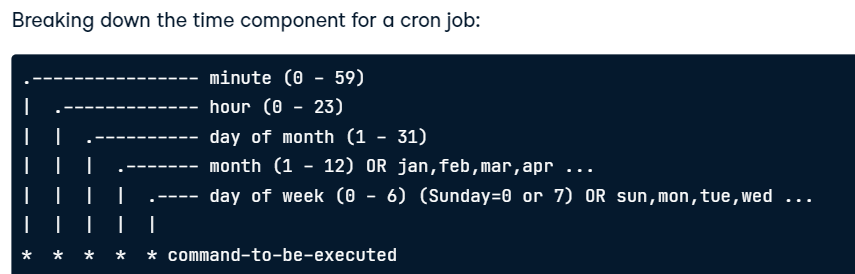

*-wildcard means always 

https://crontab.guru/ 

^website to help schedule jobs

# Bash Scripting

## Script Basics

* Moving from command-line to Bash script
* Variables and data types in Bash scripting
* Control statements (if, for loops)
* Functions and script automation

**Bash script anatomy** 

A Bash script has a few key defining features:

* Usually begins with she-bang line - `#!/usr/bash` (on its own line)
  * So interpreter knoows it is a Bash script and to use Bash located in `/usr/bash`
  * Could be a different path - type `which bash` to check location (`/bin/bash` for colab)
* Middle lines contain commands

To save and run:
* Give file extension `.sh`
  * Technically not needed if first line has the she-bang and path ro Bash, but a convention
* Can be run in the terminal using `bash script_name.sh`
  * Or if you have mentioned first line (`#!/usr/bash`) ou can simply run using `./script_name.sh`

In [ ]:
!which bash

/bin/bash


In [ ]:
%%writefile eg.sh
#!/bin/bash
echo "Yellow World"
echo "Goodbye Pool Whirled"

Writing eg.sh


In [ ]:
!cat eg.sh

#!/bin/bash
echo "Yellow World"
echo "Goodbye Pool Whirled"

In [ ]:
!bash ./eg.sh

Yellow World
Goodbye Pool Whirled


**Bash and piped script**

In [ ]:
%%writefile lat_sort.sh
#!/bin/bash
head -n 20 sample_data/california_housing_test.csv | cut -d "," -f 2 | sort -d

Writing lat_sort.sh


In [ ]:
!cat lat_sort.sh
# sorts first 20 lines of latitude

#!/bin/bash
head -n 20 sample_data/california_housing_test.csv | cut -d "," -f 2 | sort -d

In [ ]:
!bash lat_sort.sh

32.970000
33.730000
33.780000
33.810000
33.820000
33.980000
34.080000
34.210000
34.260000
35.480000
35.850000
36.330000
36.510000
37.250000
37.370000
37.530000
38.400000
38.630000
38.690000
"latitude"


**Standard streams & arguments**

In Bash scripting, there are three 'streams' for your program:

* STDIN (standard input). A stream of data into the program
* STDOUT (standard output). A stream of data **out** of the program
* STDERR (standard error). Errors in your program.

By default, these streams will come from and write out to the terminal

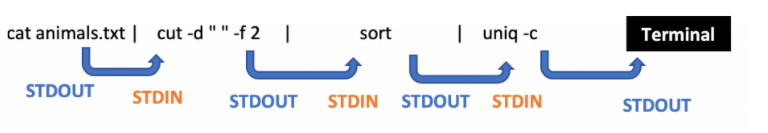

**Passing arguments to a Bash script**

Bash scripts can take **arguments** to be used inside by adding a space after the script execution call.

* ARGV is the array of all the arguments given to the program
* Each argument can be accessed via the `$` notation. The first as `$1`, the second as `$2` etc.
* `$@` and `$*` give all the arguments in ARGV
* `$#` gives the length of ARGV (number of arguments)

In [ ]:
%%writefile args.sh
#!/bin/bash
echo $1
echo $2
echo $@
echo "There are " $# "arguments"

Writing args.sh


In [ ]:
!bash args.sh one two three four five

one
two
one two three four five
There are  5 arguments


## Variables in Bash Scripting

**Assigning variables** 

Similar to other languages, you can assign variables with the equals notation.

```var1="Moon"```

Then reference with `$` notation.

```echo $var1```

In [ ]:
!var1="Atticus"

In [ ]:
!echo $var1
#hmm doesn't work in colab, can access environment variables tho:

In [ ]:
!printenv | head 

CUDNN_VERSION=7.6.5.32
LD_LIBRARY_PATH=/usr/local/nvidia/lib:/usr/local/nvidia/lib64
CLOUDSDK_PYTHON=python3
LANG=en_US.UTF-8
HOSTNAME=4c56bf8c943b
OLDPWD=/
CLOUDSDK_CONFIG=/content/.config
NVIDIA_VISIBLE_DEVICES=all
DATALAB_SETTINGS_OVERRIDES={"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\"172.28.0.2\""]}
ENV=/root/.bashrc


In [ ]:
!echo $LANG

en_US.UTF-8


In [ ]:
%env SECRET=1234567890

env: SECRET=1234567890


In [ ]:
!echo $SECRET

1234567890


**Quotes - Single, Double, and Backticks**

In Bash, using different quotation marks can mean different things. Both when creating variables and printing.

* Single quotes (`'sometext'`) = Shell interprets what is between literally
* Double quotes (`"sometext"`) = Shell interpretes literally **except** using `$` and backticks
* Backticks `` = Shell runs the command and captures STDOUT back into a variable  

> Single quotes:

In [ ]:
!now_var='NOW'

In [ ]:
!now_var_singlequotes='$now_var'

In [ ]:
!echo $now_var_singlequotes
# returns $now_var

$now_var

> Double quotes:

In [ ]:
!now_var_doublequotes="$now_var"
# returns $now_var"

In [ ]:
!echo $now_var_singlequotes
# returns NOW

NOW

> backticks:

In [ ]:
!date

Fri Jan  1 22:58:07 UTC 2021


In [ ]:
%env rightnow_doublequote="The date is `date`"

env: rightnow_doublequote="The date is `date`"


In [ ]:
!echo $rightnow_doublequote
#works on regular shell

"The date is `date`"


**Numeric variables in Bash**

Numbers are not natively supported

`expr` is a useful utility program to do basic math in shell

can't use decimals however

In [ ]:
!expr 1 + 9
#note spacing

10


`bc` - basic calculator - can handle decimals



In [ ]:
!bc
# works in  regular terminal

/bin/bash: bc: command not found


In [ ]:
!echo "5 + 7.5" | bc


/bin/bash: bc: command not found


scale argument for how many decimal places

In [ ]:
!echo "scale = 3; 10 / 3" | bc
#returns 3.333

/bin/bash: bc: command not found


can assign numeric variables just like string variables

In [ ]:
%%writefile scrip.sh
name="Scott"
age=$1
echo "$name is $age years old"

Overwriting scrip.sh


In [ ]:
!bash scrip.sh 28

Scott is 28 years old


**Arrays in Bash**

Two types of arrays:
* Numerically indexed array - 'list' in Python
* Associative array - similar to normal array, but with key-value pairs, not numerical indexes 'dict' in Python

**Creating numerical array in Bash**
1. Declare without adding elements: ```declare -a my_first_array```
2. Create and add elements at same time: `my_first_array=(1 2 3)`

Use spaces (not commas) between array elements

Array properties:
* All array elements can be returned using `array[@]`. Though note that Bash requires curly brackets around the array name when you want to access these properties
* Length of an array is accessed using - `#array[@]`
* Array elements accessed using square brackets `array[i]` - uses 0 indexing just like python
* Can slice subset of array `array[@]:N:M` - N is starting index and M is how many elements to return
* Can append to array with - `array+=(elements)`
```
my_array=( 1 3 5 2 )
echo ${my_array[@]} 
```

```echo ${#my_array[@]}```
returns 4

`echo ${my_first_array[2]}` returns 5

`my_first_array[0]=999` overwrites 0th item in index

`echo ${my_first_array[@]:2:2}` - returns items 2-3

`my_first_array+=(10)`

**Creating an associative array**

You can create an associative array using the declare syntax (and uppercase `-A`)

You can either declare first, then add elements or do it all on one line

```
declare -A city_details 
city_details=([city_name]="New York" [population]=14000000)
echo `$`{city_details[city_name]} 
```
One line declare:
`declare -A city_details=([city_name]="New York" [population]=14000000)`


Can access the 'keys' of an associative array with an `!`

```
echo `$`{!city_details[@]} 
```

## Control Statements in Bash Scripting

**A basic IF statement**

```
if [ CONDITION ]; then 
   # SOME CODE
else
   # SOME OTHER CODE
fi
```
Two tips:
* Spaces between square brackets and conditional elements inside (first line)
* Semi-colon after bracket clause

In [ ]:
%%writefile if1.sh
x=$1
if [ $x == "King" ]; then
  echo "$x is a King!"
else
  echo "$x is not a King!"
fi


Overwriting if1.sh


In [ ]:
!bash if1.sh "Queen"

Queen is not a King!


**Arithmetic IF statements**

1. double-parenthesis structure:



In [ ]:
%%writefile arithif.sh
x=$1
if (($x > 5)); then
  echo "$x is more than 5!"
fi

Writing arithif.sh


In [ ]:
!bash arithif.sh 7

7 is more than 5!


2. can also use square brackets and arithmetic flag
  * `eq` for '='
  * `ne` for '!='
  * `lt` for '<' - `gt` for '>'
  * `le` for '<=' - `ge` for '=>'
  


In [ ]:
%%writefile arithif1.sh
x=10
if [ $x -gt 5 ]; then
  echo "$x is more than 5!"
fi

Overwriting arithif1.sh


In [ ]:
!bash arithif1.sh 

10 is more than 5!


Using AND and OR in Bash

To combine conditions (AND) or use an OR statement in bash, use following:
* `&&` for AND
* `||` for OR

In [ ]:
%%writefile chain_conditionals.sh
x=10
if [ $x -gt 5 ] && [ $x -lt 11 ]; then
  echo "$x is more than 5 and less than 11"
fi

Overwriting chain_conditionals.sh


In [ ]:
!bash chain_conditionals.sh

10 is more than 5 and less than 11


In [ ]:
%%writefile double_square_bracket_notation.sh
x=10
if [[ $x -gt 5  &&  $x -lt 11 ]]; then
  echo "$x is more than 5 and less than 11"
fi

Writing double_square_bracket_notation.sh


In [ ]:
!bash double_square_bracket_notation.sh

10 is more than 5 and less than 11


**IF and command-line programs**

You can use many command-line programs directly in the condiional, removing the square brackets.

In [ ]:
%%writefile search.sh
if grep -q 'California' sample_data/README.md; then
  echo "California is inside!"
fi

Overwriting search.sh


In [ ]:
!bash search.sh

California is inside!


'^ -q flag in grep is "quiet" - returns true/false instead of matched words themselves

**FOR loops & WHILE statements**

similar syntax to python


In [ ]:
%%writefile firstloop.sh
for x in 1 2 3
do 
  echo $x
done

Writing firstloop.sh


In [ ]:
!bash firstloop.sh 

1
2
3


**FOR loop and number ranges**

Bash has a neat way to create a numeric range called a 'brace expansion':
* `{START..STOP..INCREMENT}`



In [ ]:
%%writefile firstloop1.sh
for x in {1..11..2}
do 
  echo $x
done

Overwriting firstloop1.sh


In [ ]:
%%writefile firstloop2.sh
for ((x=2;x<=12;x+=2))
do 
  echo $x
done

Writing firstloop2.sh


In [ ]:
!bash firstloop2.sh

2
4
6
8
10
12


**Glob expansions**

Bash allows pattern-matching expansinos into a for loop using the `*` symbol such as files in a directory.


In [ ]:
!ls sample_data/

anscombe.json		      housing	      mnist_train_small.csv
california_housing_train.csv  mnist_test.csv  README.md


In [ ]:
%%writefile globs.sh 
for file in sample_data/* 
do
  head -n 1 $file
done

Overwriting globs.sh


In [ ]:
!bash globs.sh

[
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

shell-within-a-shell FOR loop

In [ ]:
%%writefile globs1.sh 
for file in $(ls sample_data/ | grep -i 'california') 
do
  head -n 1 sample_data/$file
done

Overwriting globs1.sh


In [ ]:
!bash globs1.sh

"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"


**WHILE statement syntax**

Similar to FOR loop, except you set a condition which is tested at each iteration. 

Iterations continue until this is no longer met!

* Use the word `while` instead of `for`
* Surround the condition in square brackets
* Multiple conditions can be chained or use double-brackets just like 'IF' statements along with ``&&`` or ``||``
* Ensure there is a change inside the code that will trigger a stop (or else my have an infinite loop)

In [ ]:
%%writefile while_loop.sh
x=1
while [ $x -le 3  ]; 
do 
  echo $x
  ((x+=1))
done

Overwriting while_loop.sh


In [ ]:
!bash while_loop.sh 

1
2
3


In [ ]:
%%writefile lat.sh
mkdir to_keep/
# Create a FOR statement on files in directory
for file in sample_data/*.csv
do  
    # Create IF statement using grep
    if grep -q 'latitude' $file ; then
        # Move wanted files to to_keep/ folder
        mv $file to_keep/
    fi
done

Overwriting lat.sh


In [ ]:
! bash lat.sh

In [ ]:
!ls to_keep/

california_housing_train.csv


**CASE statements**

Help create clearer and more efficient code than multiple nested IFs and WHILEs

* Begin by selectin which variable or string to match against
  * Could call shell-within-a-shell here
* Add as many possible matches & actions as you like 
  * Can use regex for the `PATTERN`. (`Air*` for 'starts with Air' or `*hat*` for 'contains hat'
* - `*)` - Common (but not required) to finish with a default command that runs if none of the other patterns match
* `esac` - finish with case backward
Basic CASE statement:

```
case 'STRINGVAR' in
  PATTERN1)
  COMMAND1;;
  PATTERN2
  COMMAND2;;
  *)
  DEFAULT COMMAND;;
esac 
```

> Testing if input is weekend or weekday:

In [ ]:
%%writefile dow.sh 
# Create a CASE statement matching the first ARGV element
case $1 in
  # Match on all weekdays
  Monday|Tuesday|Wednesday|Thursday|Friday)
  echo "It is a Weekday!";;
  # Match on all weekend days
  Saturday |Sunday)
  echo "It is a Weekend!";;
  # Create a default
  *) 
  echo "Not a day!";;
esac

Writing dow.sh


In [ ]:
!bash dow.sh Wednesday

It is a Weekday!


In [ ]:
!bash dow.sh Saturday

It is a Weekend!


## Functions and Automation (Cron)

**Bash function anatomy**

```
funcition_name () {
  #function_code
  return #something
}
```
* Start by naming the function
* Add open and close parenthesis after the function name
* Add code inside curly brackets. Can use anything in function (loops, IF, shell-within-a-shell)
* Optionally return something
  * different than return values in other languages

Alternate function anatomy:

```
function function_name {
  #function_code
  return #something
}
```


In [ ]:
%%writefile fun1.sh
function print_hello () {
    echo "Hello World!"
}
print_hello

Writing fun1.sh


In [ ]:
!bash fun1.sh

Hello World!


In [ ]:
%%writefile what_day.sh
# Create function
function what_day_is_it () {

  # Parse the results of date
  current_day=$(date | cut -d " " -f1)

  # Echo the result
  echo "Today is $current_day"
}

# Call the function
what_day_is_it

Overwriting what_day.sh


In [ ]:
!bash what_day.sh

Today is Sun


**Arguments, return values, and scope**

Passing arguments into functions is similar to how you pass arguments into a script; Using the `$1` notation.

You also have access to the special `ARGV` properties:
* Each argument can be accessed with `$1`, `$2` notation
* `$@` and `$*` give all the arguments in `ARGV`
* `$#` gives the length (number) of arguments

In [ ]:
%%writefile args.sh
function print_filename {
    echo "The first file was $1"
    for file in $@
    do
      echo "This file has a name $file"
    done
}
print_filename "LOTR.txt" "mod.txt" "A.py"

Writing args.sh


In [ ]:
!bash args.sh

The first file was LOTR.txt
This file has a name LOTR.txt
This file has a name mod.txt
This file has a name A.py


Scope in programming refers to how accessible a variable is:

* Global means something is accessible anywhere in the program
* Local means something is only accessible in a certain part of the program

In Bash, all variables are global by default

Can use `local` keyword when declaring variable to restrict variable scope:
```
function print_filename {
  local first_filename=$1
}
```

Return values:

The return option in Bash is only meant to determine if the function was a success (0) or failure (other value 1-255). It is captured in the global variable `$?`

To return values from a function one has options:
1. Assign intended output to a global variable
2. `echo` what we want back and capture using shell-within-a-shell

In [ ]:
%%writefile convert.sh
function convert_temp {
    echo $(echo "scale=2; ($1 - 32) * 5 / 9" | bc)
}
converted=$(convert_temp 30)
echo "30F in Celsius is $converted C"

Writing convert.sh


In [ ]:
!bash convert.sh
#works locally!

convert.sh: line 2: bc: command not found
30F in Celsius is  C


In [ ]:
%%writefile sum_array.sh
function sum_array () {
  local sum=0
  # Loop through, adding to base variable
  for number in "$@"
  do
    sum=$(echo "$sum + $number" | bc)
  done
  # Echo back the result
  echo $sum
  }
# Call function with array
test_array=(14 12 23.5 16 19.34)
total=$(sum_array "${test_array[@]}")
echo "The sum of the test array is $total"

Overwriting sum_array.sh


In [ ]:
!bash sum_array.sh 
#works locally!

sum_array.sh: line 6: bc: command not found
sum_array.sh: line 6: bc: command not found
sum_array.sh: line 6: bc: command not found
sum_array.sh: line 6: bc: command not found
sum_array.sh: line 6: bc: command not found
The sum of the test array is 


In [ ]:
!echo $(expr 2 + 4)

6


**Scheduling scripts with Cron**

Cron is driven by a `crontab`, which is a file that contain `cronjobs`. which each tell `crontab` what code to run and when.

You can see what schedules (`cronjobs`) are currently programmed using the command:

`crontab -l`

In [ ]:
!crontab -l
#works locally

/bin/bash: crontab: command not found


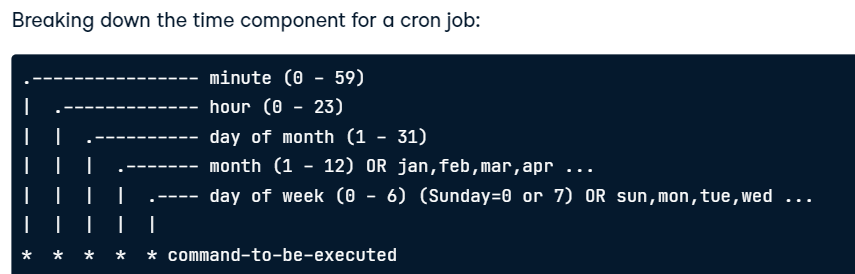

Basic cronjob:

A script called extract_data.sh to run every morning at 1.30am. 

1. In terminal type `crontab -e` to edit your list of cronjobs.
  * May ask what editor you want to use. `nano` is an easy option and less-steep learning curve than vi (vim)
2. Create the cronjob:
  * `30 1 * * * extract_data.sh`
3. Exit the editor to save it.
4. Check it is there by running `crontab -l`

# Git

In [1]:
pass

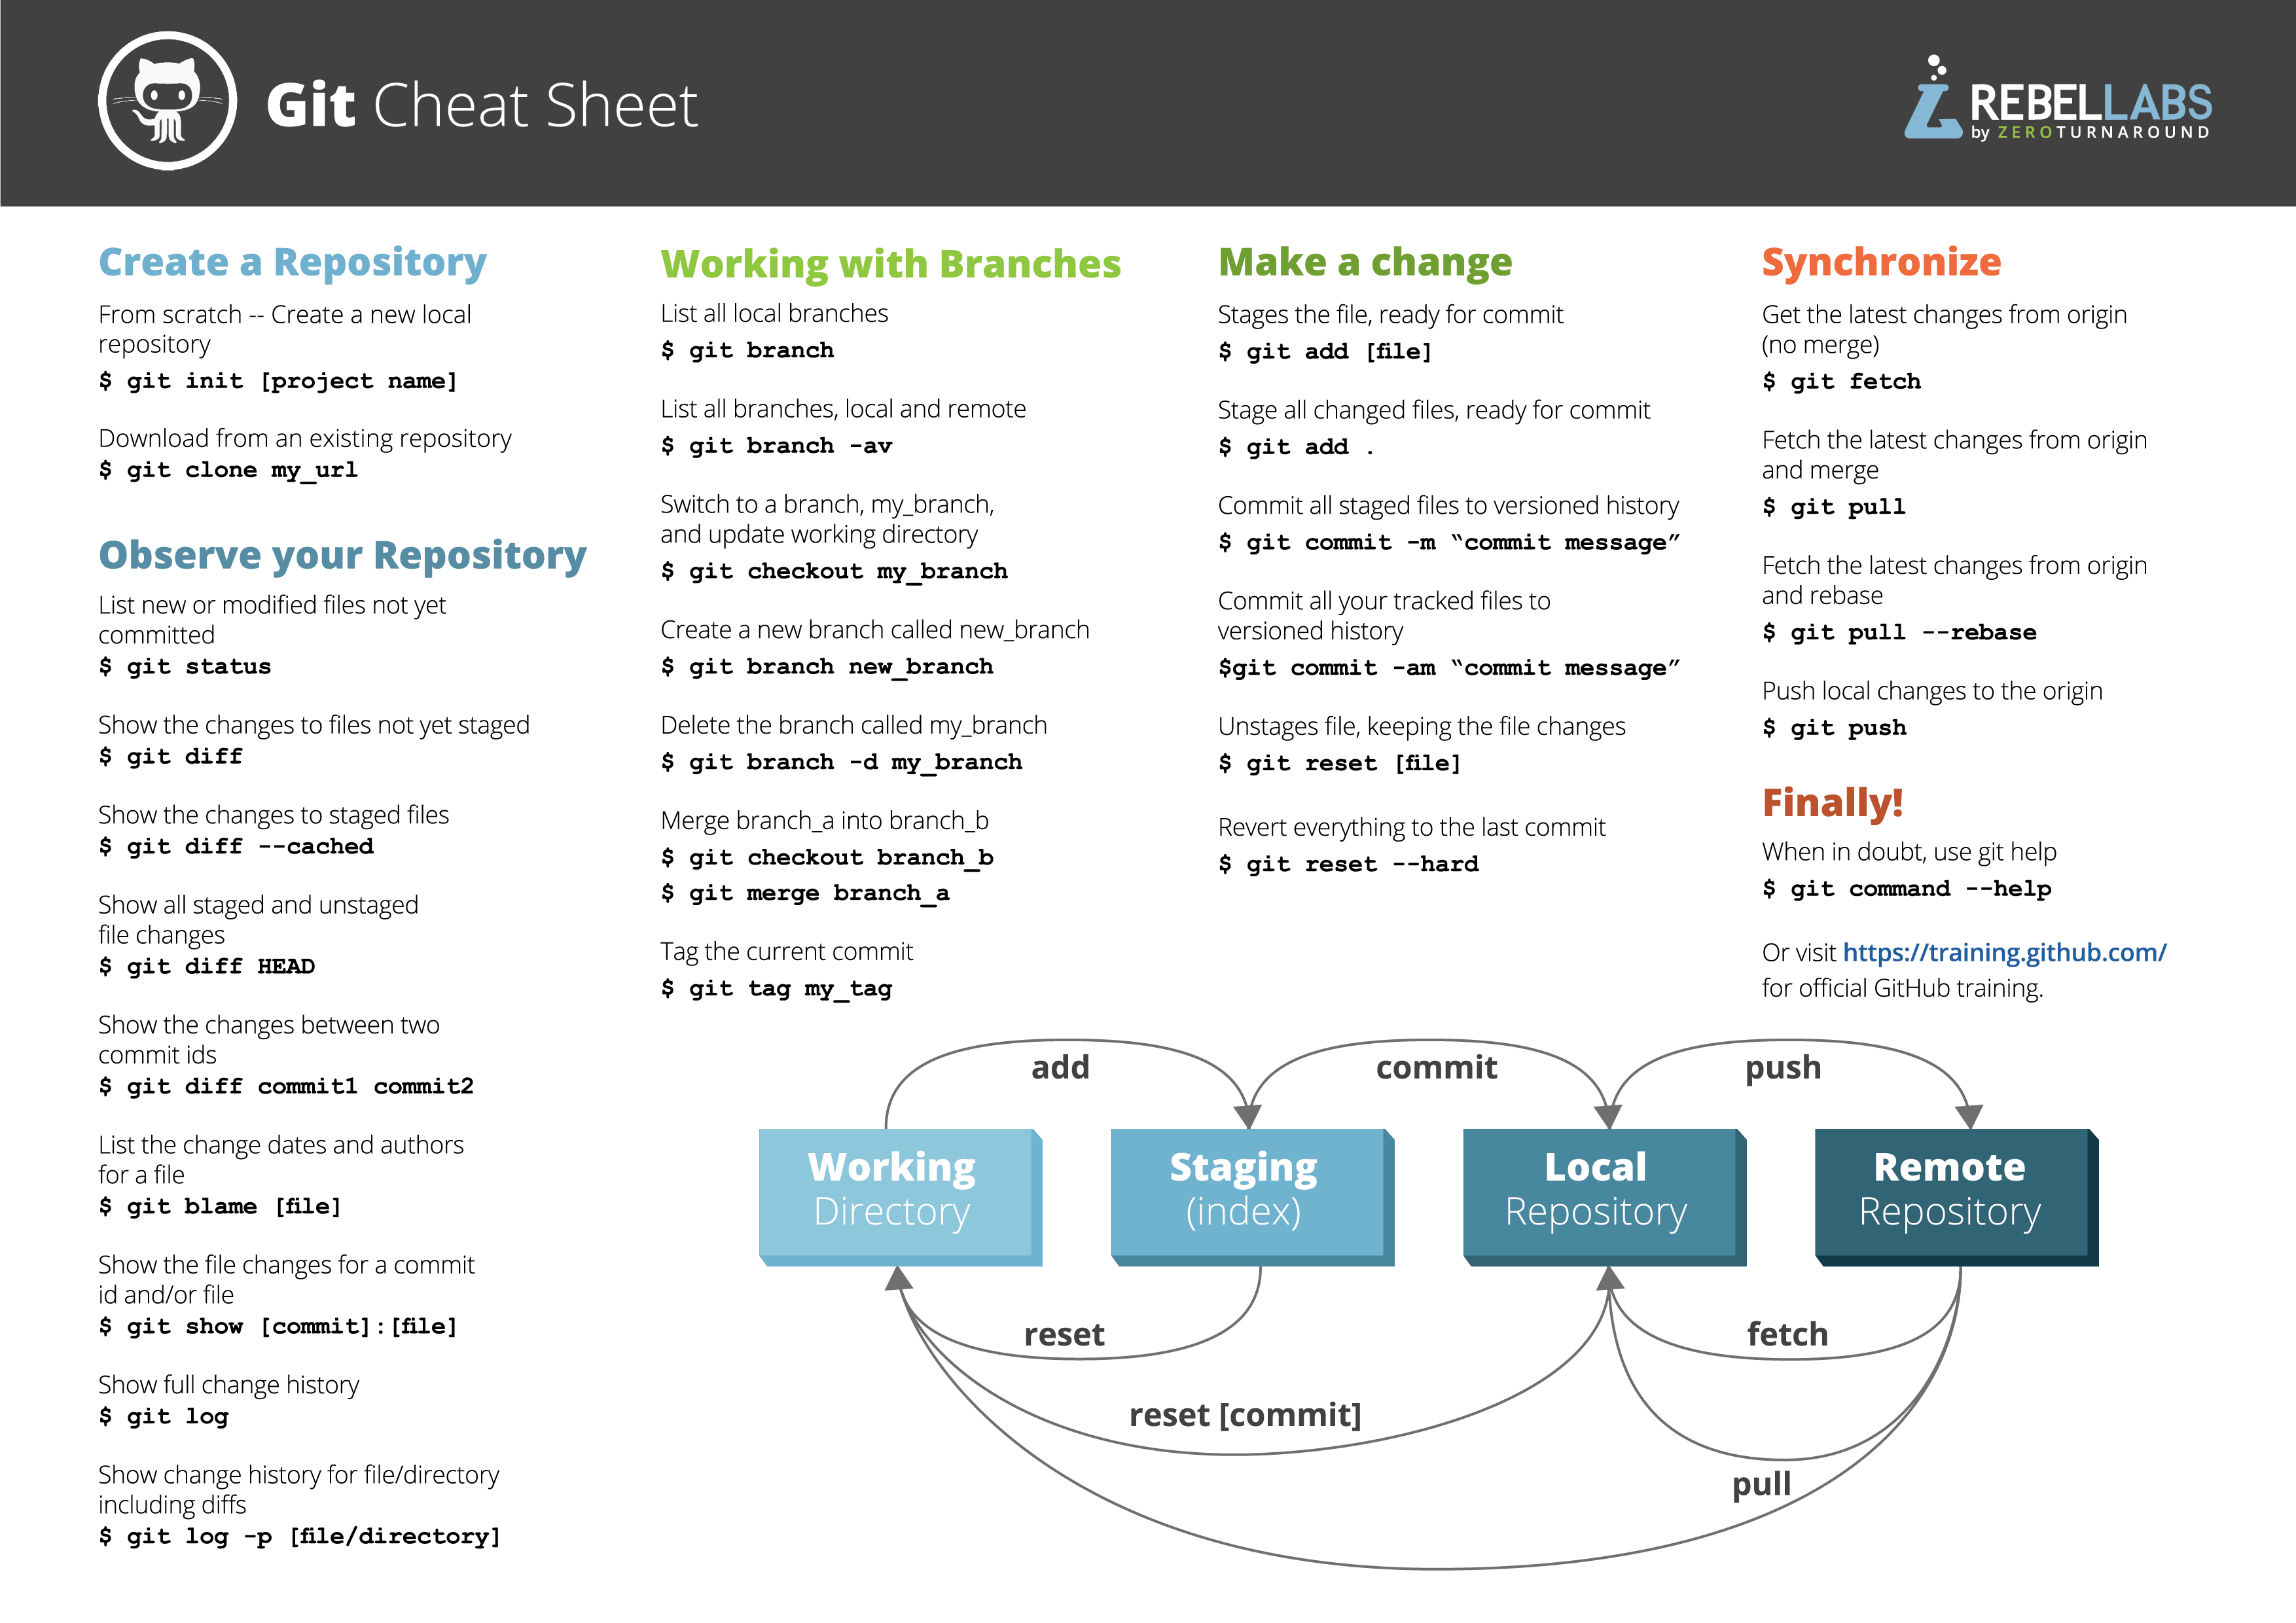